In [1]:
from csoundengine import *

In [2]:
s = Engine().session()

--Csound version 7.0 (double samples) May 14 2025
[commit: ba226ccf9e9d38cd4516498e6ff7d59ba734b5e1]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


In [3]:
s.defInstr('foo', r'''
; foo instr
; Args:
;   kfreq: frequency
outch 1, oscili:a(0.1, lag(kfreq, 0.05)) * cossegr:a(0, 0.05, 1, 0.05, 0)
''', args={'kfreq': 800})


Instr(foo, kfreq=800)


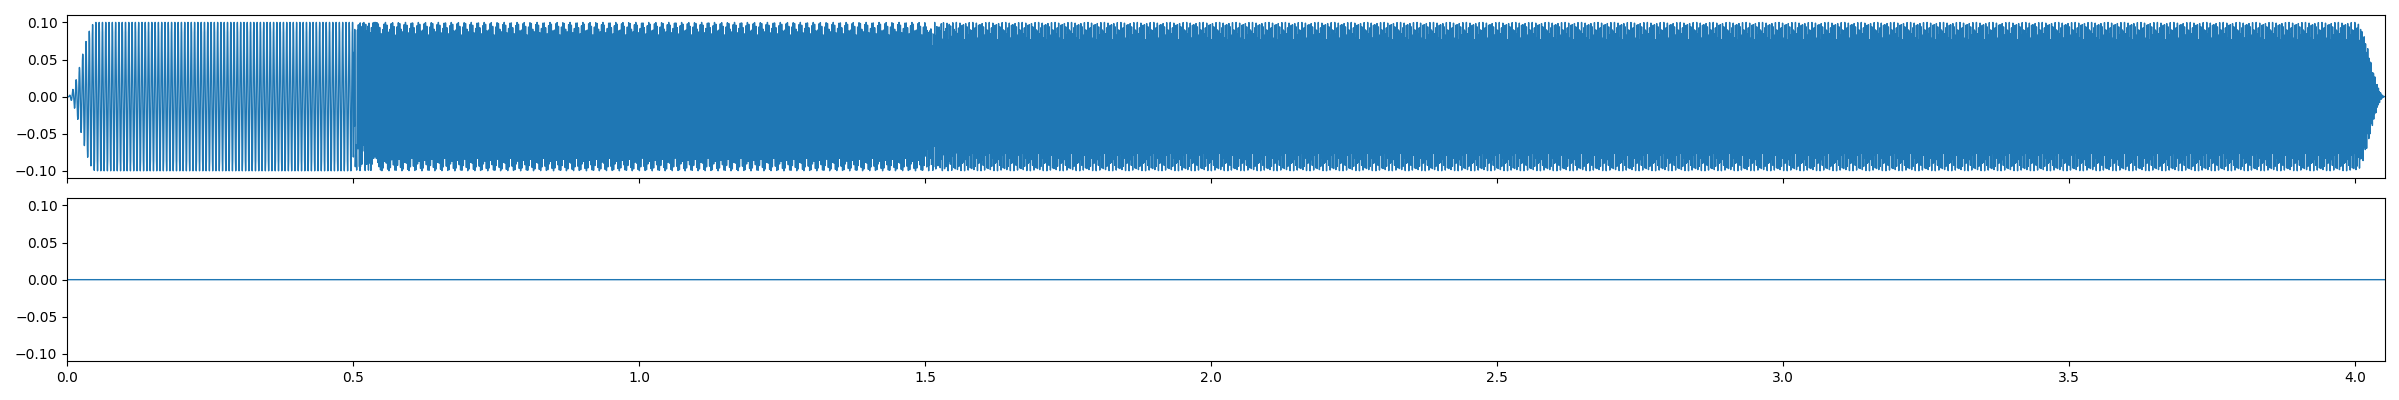

In [4]:
with s.rendering() as r:
    sy = s.sched('foo', 0, 4, kfreq=4000)
    sy.set(kfreq=400, delay=0.5)
    sy.set(kfreq=800, delay=1.5)
r

In [1]:
from csoundengine.offline import OfflineSession
r = OfflineSession()

In [2]:
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, lag(kfreq, 0.5)
outch 1, asig
''')

Instr(vco, ifreqbus:5)

Bus('control', token=4)



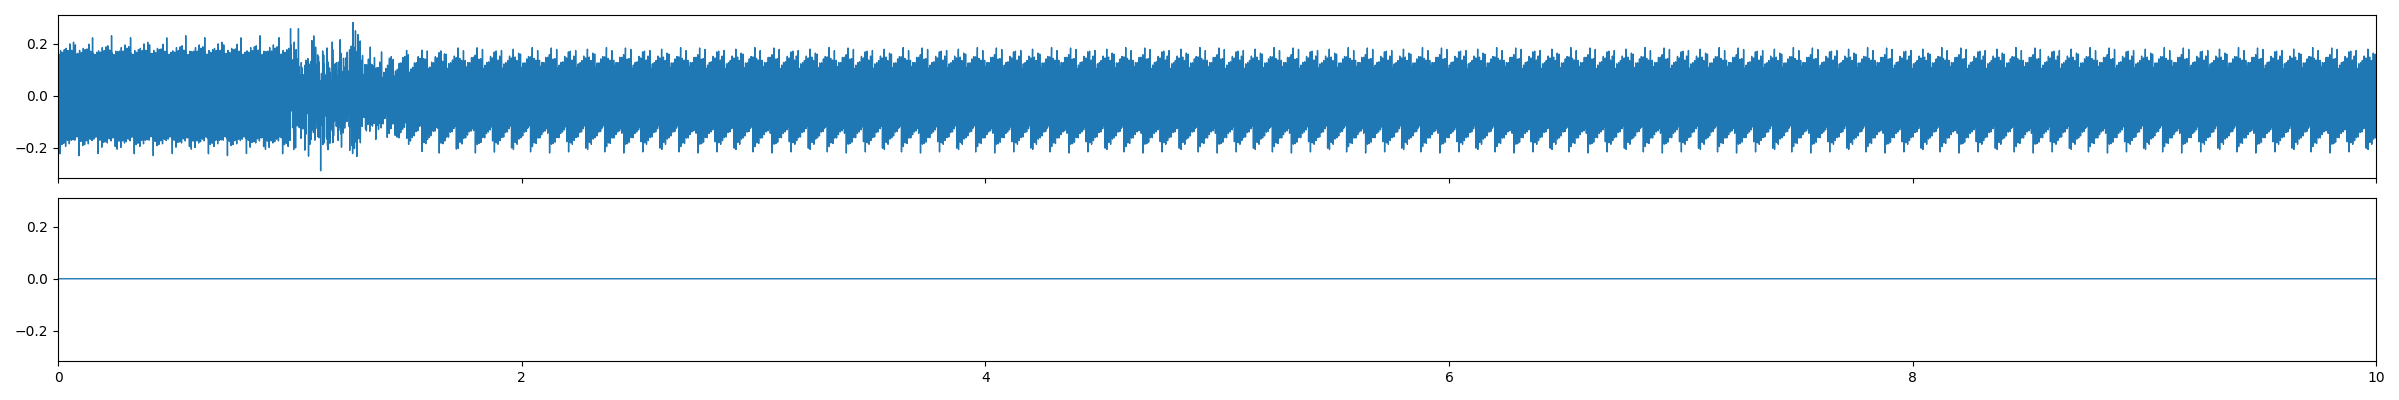

In [8]:
freqbus = r.assignBus(value=500)
print(freqbus)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
freqbus.set(1000, delay=1)
r.render("~/tmp/vcotest.wav")
r

In [9]:
freqbus

Bus('control', token=4)


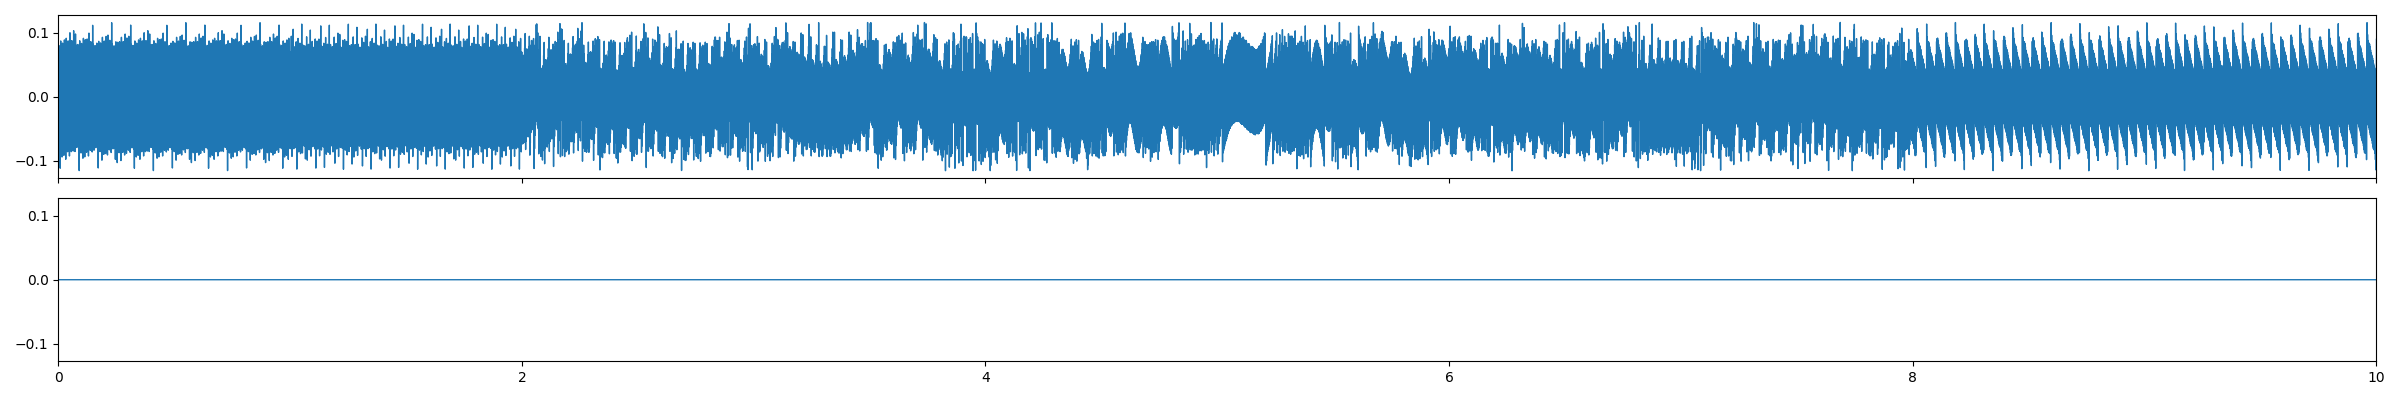

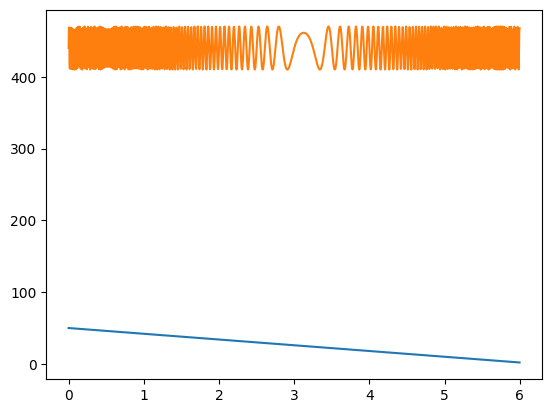

In [10]:
from csoundengine.offline import *
from matplotlib import pyplot as plt
import numpy as np
import bpf4

r = OfflineSession()
r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 50, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)
r.render("~/tmp/vcotest.wav")
plt.plot(times, vibfreqs)
plt.plot(times, freqs)
r



In [15]:
from csoundengine import *
import bpf4
import numpy as np

r = Engine().session()

r.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')

freqbus = r.assignBus(value=500)
s1 = r.sched('vco', 0, 10, ifreqbus=freqbus)
dur = 6
vibfreq = bpf4.linear(0, 50, dur, 2)
times = np.arange(0, dur, 0.004)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*2*np.pi*vibfreqs) * 30 + 440
freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=2)



--Csound version 7.0 (double samples) May 14 2025
[commit: ba226ccf9e9d38cd4516498e6ff7d59ba734b5e1]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


36

In [20]:
for e in list(Engine.activeEngines.values()):
    e.stop()

		   overall amps:  0.11614  0.00000
	   overall samples out of range:        0        0
0 errors in performance
15382 512 sample blks of 64-bit floats written to dac:Built-in Audio Analog Stereo:


In [21]:
from csoundengine import *
import numpy as np
import bpf4

s = Engine().session()

s.defInstr('vco', r'''
ifreqbus = p5
kfreq = busin:k(ifreqbus)
asig vco2 0.1, kfreq
outch 1, asig
''')


--Csound version 7.0 (double samples) May 14 2025
[commit: ba226ccf9e9d38cd4516498e6ff7d59ba734b5e1]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Instr(vco, ifreqbus:5)

In [22]:
freqbus = s.assignBus(value=500)
dur = 6
s1 = s.sched('vco', 0, dur+1, ifreqbus=freqbus)
times = np.arange(0, dur, 0.004)
freq = bpf4.halfcos(0, 440, dur*0.5, 880, dur, 440)
freqs = freq.map(times)
freqbus.automate((times, freqs), delay=0)


41

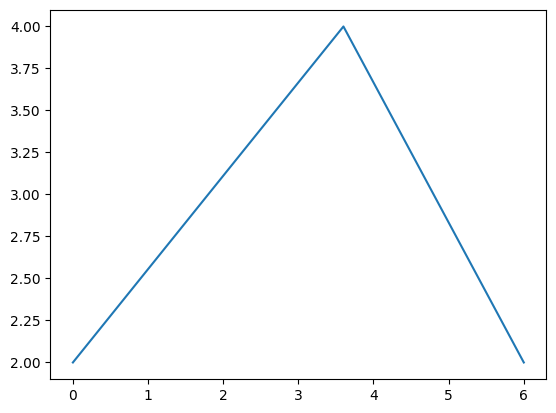

41

In [23]:
freqbus = s.assignBus(value=440)
dur = 6
s1 = s.sched('vco', 0, dur, ifreqbus=freqbus)

# vibfreq = bpf4.halfcos(0, 2, dur*0.5, 10, dur, 2)
vibfreq = bpf4.linear(0, 2, dur*0.6, 4, dur, 2)

vibfreq.plot()
times = np.arange(0, dur, 0.05)
vibfreqs = vibfreq.map(times)
freqs = np.sin(times*(2*3.141592)*vibfreqs) * 10 + 440
# freqbus.set(1000, delay=1)
freqbus.automate((times, freqs), delay=0)


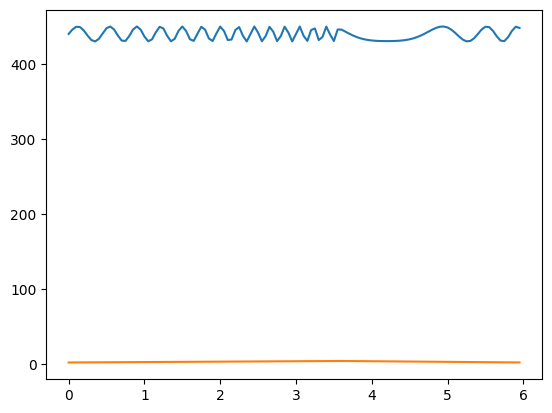

In [5]:
from matplotlib import pyplot as plt
plt.plot(times, freqs)
plt.plot(times, vibfreqs)

RenderJob(outfile='/tmp/tmpc4vq3get.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=10, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/tmp/tmpc4vq3ge...>)
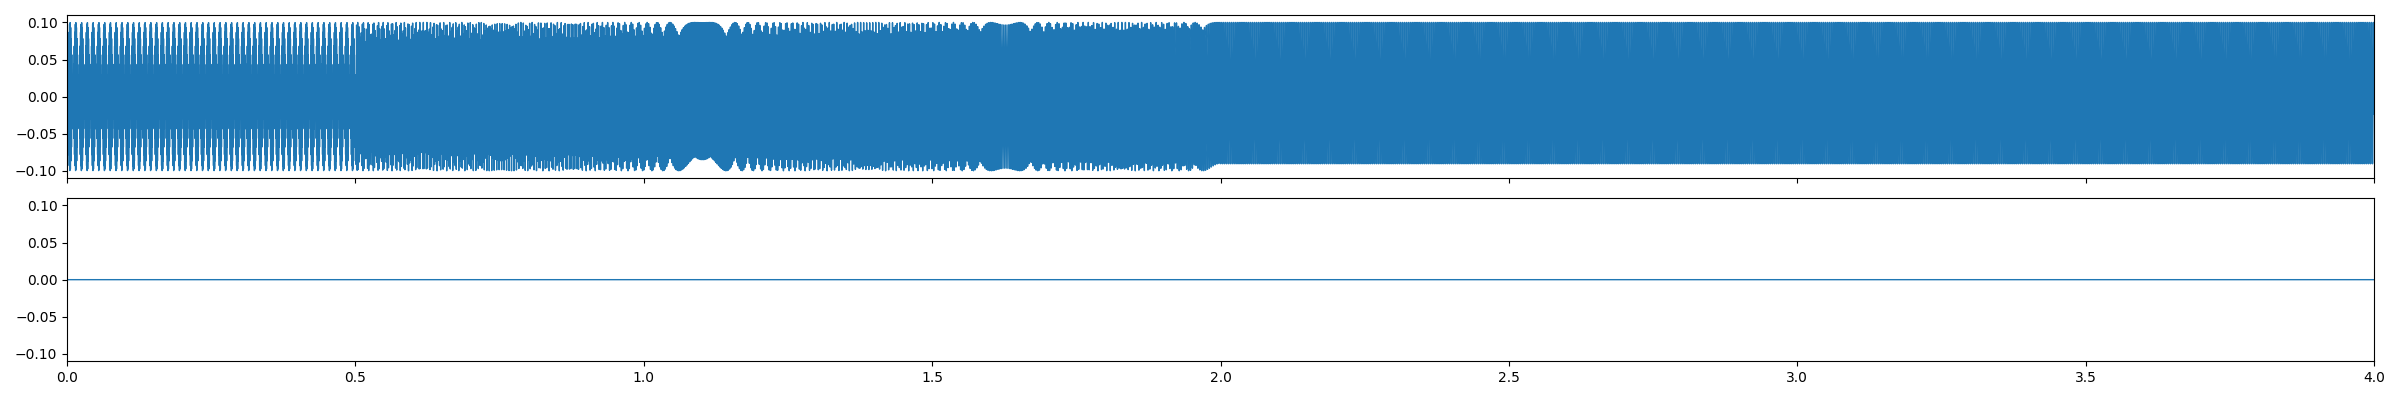

In [25]:
from csoundengine.offline import OfflineSession

r = OfflineSession()
r.defInstr('testautom', r'''
|kfreq=1000|
outch 1, oscili:a(0.1, kfreq)
''')

ev = r.sched('testautom', 0, 4)
ev.automate('kfreq', (0.5, 500, 2, 300))
r.render(endtime=10)

RenderJob(outfile='/tmp/tmpx0x0mpdy.wav', samplerate=44100, encoding='float32', starttime=0.0, endtime=20, process=<Popen: returncode: 0 args: ['/usr/local/bin/csound', '-o', '/tmp/tmpx0x0mpd...>)
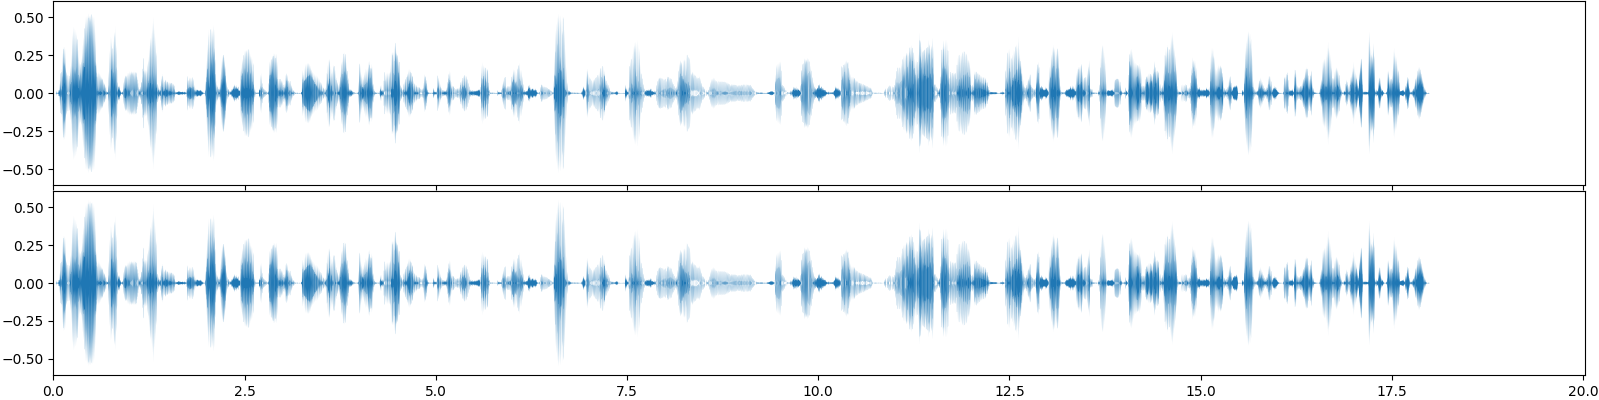

In [26]:
from csoundengine.offline import OfflineSession

r = OfflineSession(numAudioBuses=0, numControlBuses=0)
ev = r.playSample("/home/em/Lib/snd/samples/speech/finneganswake-fragm01.flac", dur=-1)
ev.automate('kspeed', (0, 1, 2, 1, 10, 0.5, 14, 1, 16, 1, 18, 2))
r.writeCsd('~/tmp/playsample.csd')
r.render(endtime=20)



In [27]:
from csoundengine import *

r = Session()
ev = r.playSample("/home/em/Lib/snd/samples/speech/colours-german-male-1.flac", dur=-1)
ev.automate('kspeed', (0, 1, 2, 1, 10, 0.5))
ev


--Csound version 7.0 (double samples) May 14 2025
[commit: ba226ccf9e9d38cd4516498e6ff7d59ba734b5e1]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

Synth(𝍪 .diskin=401.0002 start=0.089 dur=-1.000 p5=/home/em/Lib/snd/samples/speech/colours-german-male-1.flac Spath=1 ichan=1 kgain=1 kspeed=0.5 kpan=0.02 ifadein=0.02 ifadeout=0 iloop=0 istart=4)